<a href="https://colab.research.google.com/github/abhinavsagar/research/blob/master/plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!git clone https://github.com/abhinavsagar/plant.git

Cloning into 'plant'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 19382 (delta 0), reused 0 (delta 0), pack-reused 19381
Receiving objects: 100% (19382/19382), 286.16 MiB | 38.81 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (19303/19303), done.


In [26]:
%cd plant

/content/plant/plant


In [0]:
import warnings
warnings.filterwarnings("ignore")
import os
import glob
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_dir ="data/train/"
test_dir="data/test/"

In [0]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [30]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) 
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes
8751 Train images
10547 Test images


In [0]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [32]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 8751 images belonging to 38 classes.
Found 10547 images belonging to 38 classes.


In [33]:
from keras.applications import ResNet50
from keras.optimizers import Adam
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in resnet.layers[:-4]:
    layer.trainable = False

def nvidia_model():
  model = Sequential()
  model.add(resnet)

  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(38))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

model = nvidia_model()
print(model.summary())  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 23104)            

In [34]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_7', 'max_pooling2d_7', 'conv2d_8', 'max_pooling2d_8', 'conv2d_9', 'max_pooling2d_9', 'flatten_3', 'dense_7', 'dropout_3', 'dense_8', 'dense_9']


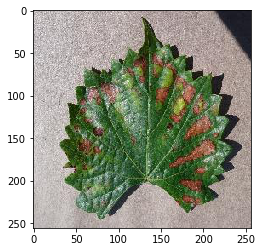

In [35]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('data/train/12/049c8615-7d94-4a4b-8467-fe20c0cecac1.JPG')
plt.imshow(img1);
img1 = image.load_img('data/test/13/00d8329b-6621-4e08-8ec5-cf702eb3b205.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [36]:
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_7').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_7').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_8').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_8').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_9').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_9').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_3').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

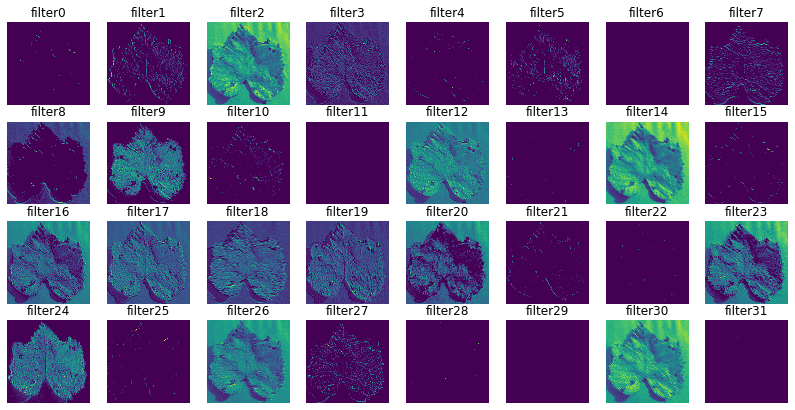

In [37]:

import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

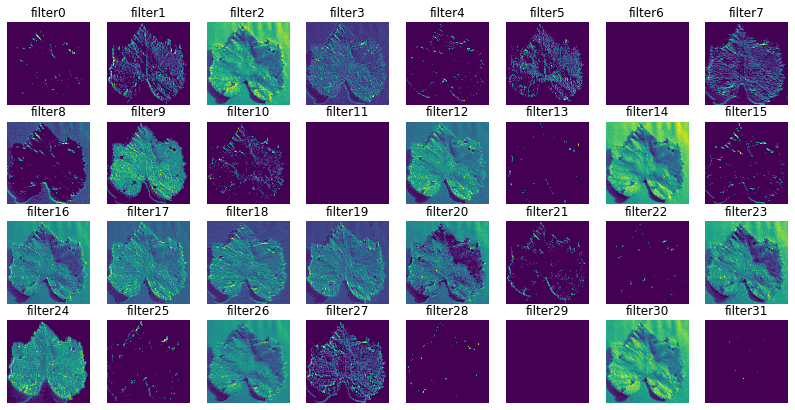

In [38]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

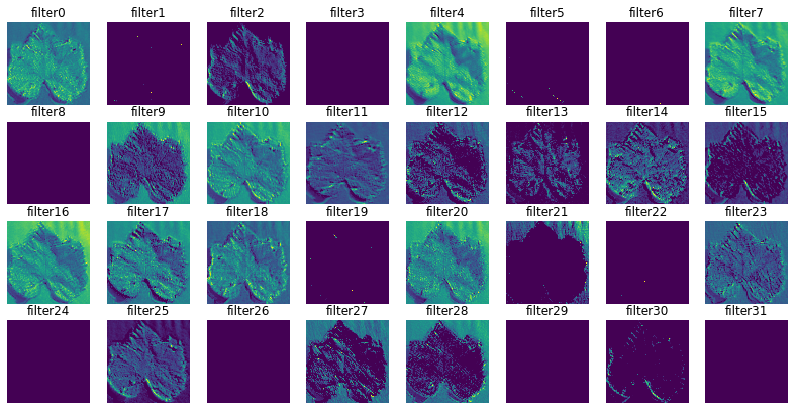

In [39]:

import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

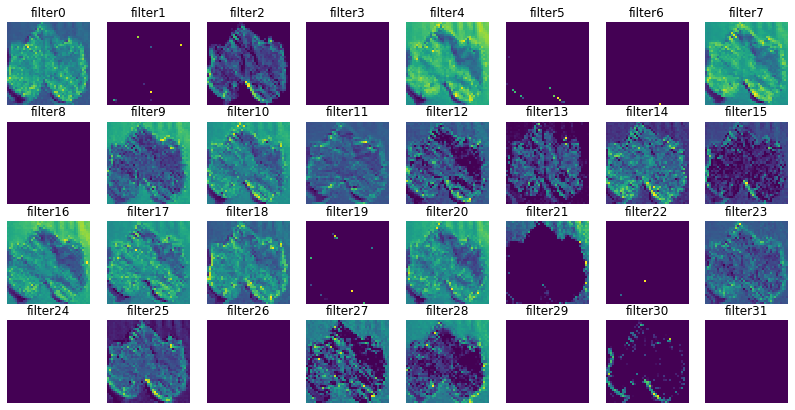

In [40]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

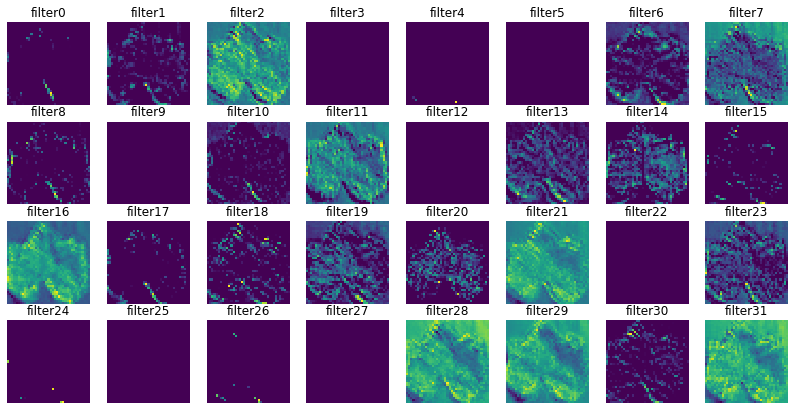

In [41]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

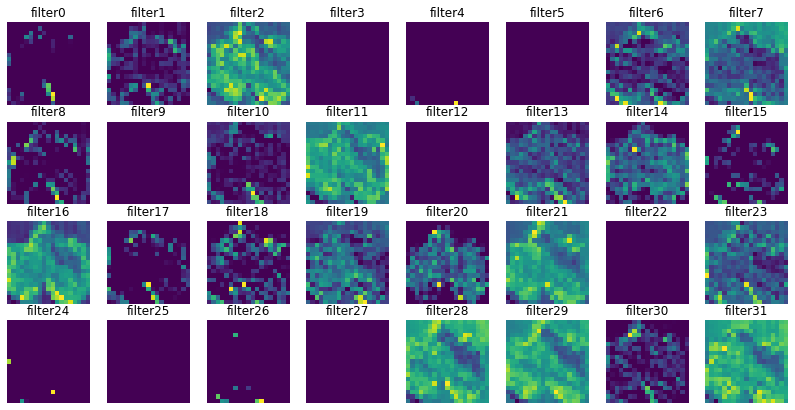

In [42]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

In [43]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 8751 images belonging to 38 classes.


In [44]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          nb_epoch=30,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          nb_val_samples= validation_generator.samples// batch_size,verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
273/273 [==============================] - 227s 831ms/step - loss: 2.2816 - acc: 0.3938 - val_loss: 1.4715 - val_acc: 0.5789
Epoch 2/30
273/273 [==============================] - 223s 818ms/step - loss: 1.2796 - acc: 0.6239 - val_loss: 1.0173 - val_acc: 0.6906
Epoch 3/30
273/273 [==============================] - 222s 812ms/step - loss: 0.9313 - acc: 0.7150 - val_loss: 0.6843 - val_acc: 0.7813
Epoch 4/30
273/273 [==============================] - 222s 812ms/step - loss: 0.7861 - acc: 0.7580 - val_loss: 0.5542 - val_acc: 0.8285
Epoch 5/30
273/273 [==============================] - 221s 809ms/step - loss: 0.6530 - acc: 0.7937 - val_loss: 0.3898 - val_acc: 0.8789
Epoch 6/30
273/273 [==============================] - 221s 809ms/step - loss: 0.5912 - acc: 0.8130 - val_loss: 0.3487 - val_acc: 0.8889
Epoch 7/30
273/273 [==============================] - 221s 808ms/step - loss: 0.4911 -

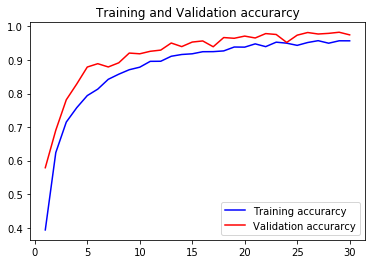

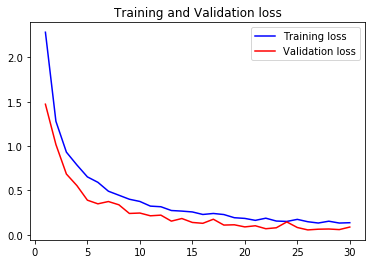

In [45]:
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()